<a href="https://colab.research.google.com/github/Madhan522/car-price-prediction-using-Machine-learning/blob/main/Car_price_Predection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset
dataset =  pd.read_csv('/content/archive (5).zip')

In [ ]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# size of the dataset
dataset.shape

(301, 9)

In [ ]:
# checking the distibution of categrorical data in the dataset for Fuel_type , Selling_type , Transmission
print(dataset.Fuel_Type.value_counts())
print(dataset.Selling_type.value_counts())
print(dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# Encoding the column "Fuel Type"
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

# Encoding the column "Selling Type"
dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)

# Encoding the column "Transmission"
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
# Splitting the data into test and training data

# here X will be "Year","present price","driven kms",fuel type,"selling type","Transmission","owner"
# here Y will be "selling price"

X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
# import the sklearn.model

from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data into test and train data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1 , random_state = 40)

In [ ]:
# Here i am using linear regression model and related dependencies

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
# Load the data into the LinearRegression
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# using the metrics by r2 score
error_score = r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score )

R squared Error :  0.8809459201296324


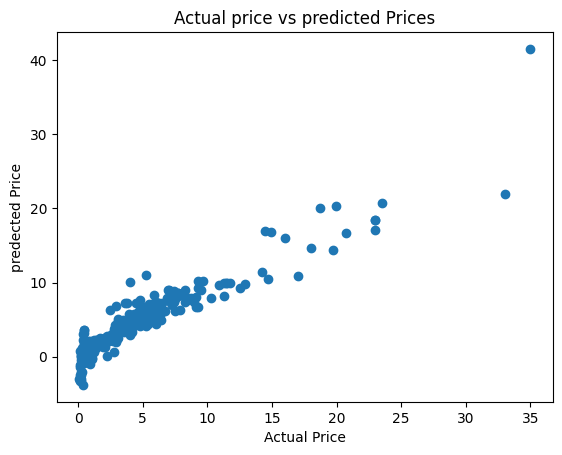

In [ ]:
# visualizing the car price

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predected Price")
plt.title("Actual price vs predicted Prices")
plt.show()

In [ ]:
#predicting on the test data
test_data_prediction = lin_reg_model.predict(X_test)
print ("R squared Error : ",error_score )

R squared Error :  0.8809459201296324


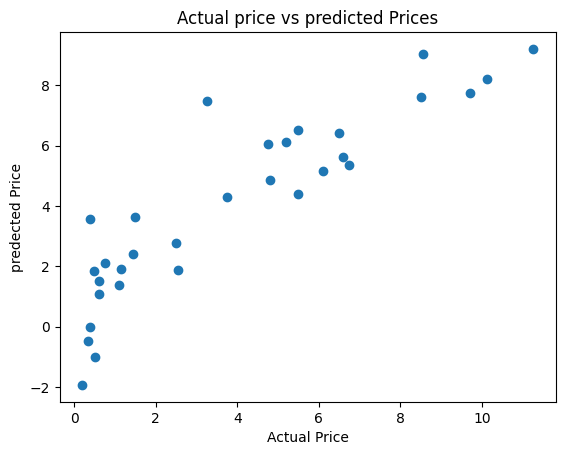

In [ ]:
# visualizing the car price

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predected Price")
plt.title("Actual price vs predicted Prices")
plt.show()